### Libraries

In [128]:
# Load Libraries
import os
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from datetime import date, timedelta,datetime
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:0,.1f}'.format 
sns.set_style("white")

In [129]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
print( mpl.__version__)

3.5.2


### Workspace

In [4]:
%cd /home/analysis_lake

/home/analysis_lake


### Day Check

In [5]:
from pytz import timezone
from datetime import datetime
today = datetime.now(timezone('Asia/Seoul'))
print(today)

2022-07-20 11:40:22.832852+09:00


In [130]:
# today = date.today()
yesterday = today - timedelta(1)
this_week = today.isocalendar()[1]

print(today.strftime('%Y-%m-%d'))
print(yesterday.strftime('%Y-%m-%d'))
print(this_week)

2022-07-20
2022-07-19
29


### Big Query

In [131]:
project_id = 'kr-co-vcnc-tada'

In [132]:
import pandas as pd
import pydata_google_auth
SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',
    'https://www.googleapis.com/auth/bigquery'
]

credentials = pydata_google_auth.get_user_credentials(
  SCOPES, auth_local_webserver=True)

In [133]:
query = """ 

SELECT *
FROM tada_bi_mart.daily_okr
WHERE driver_type in ('NXT') AND date_kr < current_date()
ORDER BY 1 

 """
                
df = pd.read_gbq(query=query, project_id=project_id, credentials=credentials, dialect='standard')


In [134]:
df.head()


,date_kr,driver_type,customer_dau_cnt,customer_dpu_cnt,avg_eta_secs,avg_ata_secs,vehicle_active_cnt,driver_active_cnt
0,2021-11-25,NXT,14636,334,543.421203438,499.610315186,52,52
1,2021-11-26,NXT,20913,802,528.168246445,482.503554502,83,83
2,2021-11-27,NXT,15518,704,548.299866131,497.215528782,72,72
3,2021-11-28,NXT,10427,488,527.680076628,479.954022989,57,57
4,2021-11-29,NXT,10252,1028,498.636528029,444.730560579,139,139


In [135]:
df_analysis = df.copy()

In [136]:
df_analysis.dtypes

date_kr               dbdate
driver_type           object
customer_dau_cnt       Int64
customer_dpu_cnt       Int64
avg_eta_secs          object
avg_ata_secs          object
vehicle_active_cnt     Int64
driver_active_cnt      Int64
dtype: object

In [137]:
df_analysis['date_kr'] = pd.to_datetime(df_analysis['date_kr'],infer_datetime_format=True)

In [138]:
df_analysis.dtypes

date_kr               datetime64[ns]
driver_type                   object
customer_dau_cnt               Int64
customer_dpu_cnt               Int64
avg_eta_secs                  object
avg_ata_secs                  object
vehicle_active_cnt             Int64
driver_active_cnt              Int64
dtype: object

In [154]:
df_analysis= df_analysis.set_index('date_kr')


In [155]:
df_analysis.head()

,driver_type,customer_dau_cnt,customer_dpu_cnt,avg_eta_secs,avg_ata_secs,vehicle_active_cnt,driver_active_cnt
date_kr,,,,,,,
2021-11-25,NXT,14636,334,543.421203438,499.610315186,52,52
2021-11-26,NXT,20913,802,528.168246445,482.503554502,83,83
2021-11-27,NXT,15518,704,548.299866131,497.215528782,72,72
2021-11-28,NXT,10427,488,527.680076628,479.954022989,57,57
2021-11-29,NXT,10252,1028,498.636528029,444.730560579,139,139


In [157]:
df_analysis.dtypes

driver_type           object
customer_dau_cnt       Int64
customer_dpu_cnt       Int64
avg_eta_secs          object
avg_ata_secs          object
vehicle_active_cnt     Int64
driver_active_cnt      Int64
dtype: object

In [19]:
from statsmodels.tsa.stattools import adfuller


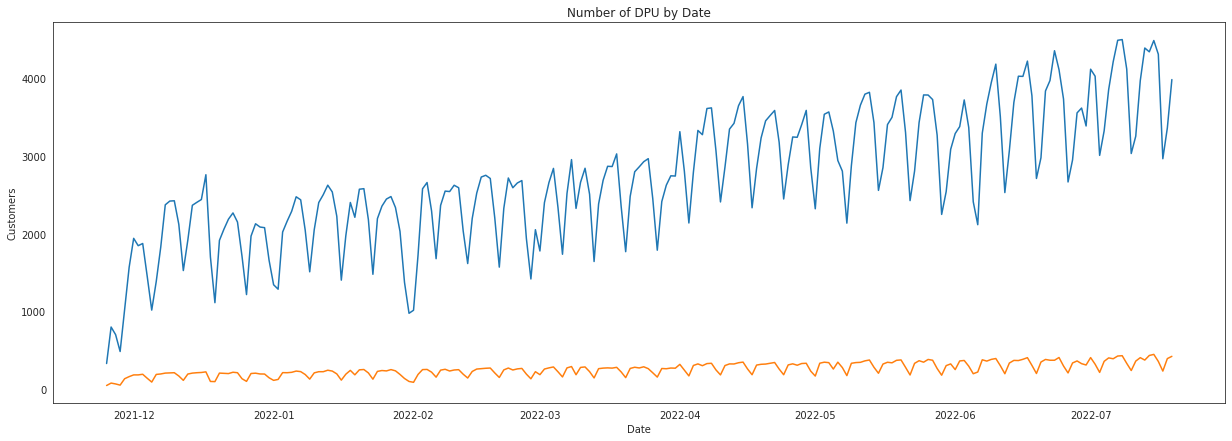

In [159]:

plt.figure(figsize=(21,7))
plt.title("Number of DPU by Date")
plt.xlabel('Date')
plt.ylabel('Customers')
plt.plot(df_analysis[['customer_dpu_cnt','vehicle_active_cnt']])
plt.show()

In [160]:
df_analysis.isna().sum()

driver_type           0
customer_dau_cnt      1
customer_dpu_cnt      0
avg_eta_secs          0
avg_ata_secs          0
vehicle_active_cnt    0
driver_active_cnt     0
dtype: int64

In [161]:
#Determine rolling statistics
df_analysis["rolling_avg"] = df_analysis["customer_dpu_cnt"].rolling(window=7).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df_analysis["rolling_std"] = df_analysis["customer_dpu_cnt"].rolling(window=7).std()

In [162]:
df_analysis

,driver_type,customer_dau_cnt,customer_dpu_cnt,avg_eta_secs,avg_ata_secs,vehicle_active_cnt,driver_active_cnt,rolling_avg,rolling_std
date_kr,,,,,,,,,
2021-11-25,NXT,14636,334,543.421203438,499.610315186,52,52,NaN,NaN
2021-11-26,NXT,20913,802,528.168246445,482.503554502,83,83,NaN,NaN
2021-11-27,NXT,15518,704,548.299866131,497.215528782,72,72,NaN,NaN
2021-11-28,NXT,10427,488,527.680076628,479.954022989,57,57,NaN,NaN
2021-11-29,NXT,10252,1028,498.636528029,444.730560579,139,139,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-15,NXT,19258,4476,537.970057582,475.743953935,451,459,"3,933.4",573.6
2022-07-16,NXT,21266,4300,528.145564516,465.159072581,361,366,"3,960.6",587.6
2022-07-17,NXT,14990,2960,524.129143845,458.892764485,237,237,"3,951.0",605.6


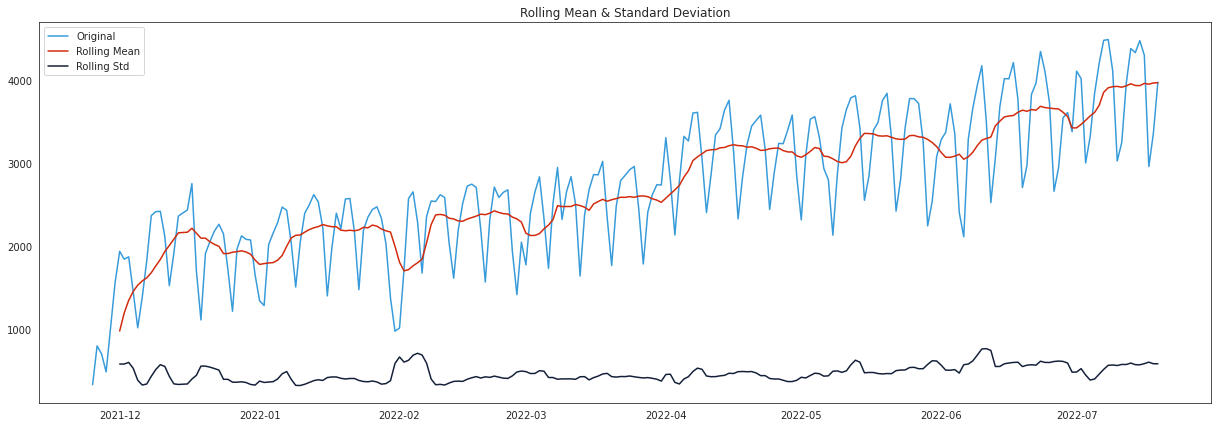

In [163]:
#Plot rolling statistics
plt.figure(figsize=(21,7))
plt.plot(df_analysis["customer_dpu_cnt"], color='#379BDB', label='Original')
plt.plot(df_analysis["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df_analysis["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [164]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_analysis['customer_dpu_cnt'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -0.4
p-value                         0.9
#Lags Used                     14.0
Number of Observations Used   222.0
Critical Value (1%)            -3.5
Critical Value (5%)            -2.9
Critical Value (10%)           -2.6
dtype: float64


In [34]:
import pmdarima as pm



In [35]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(df_analysis['customer_dpu_cnt'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

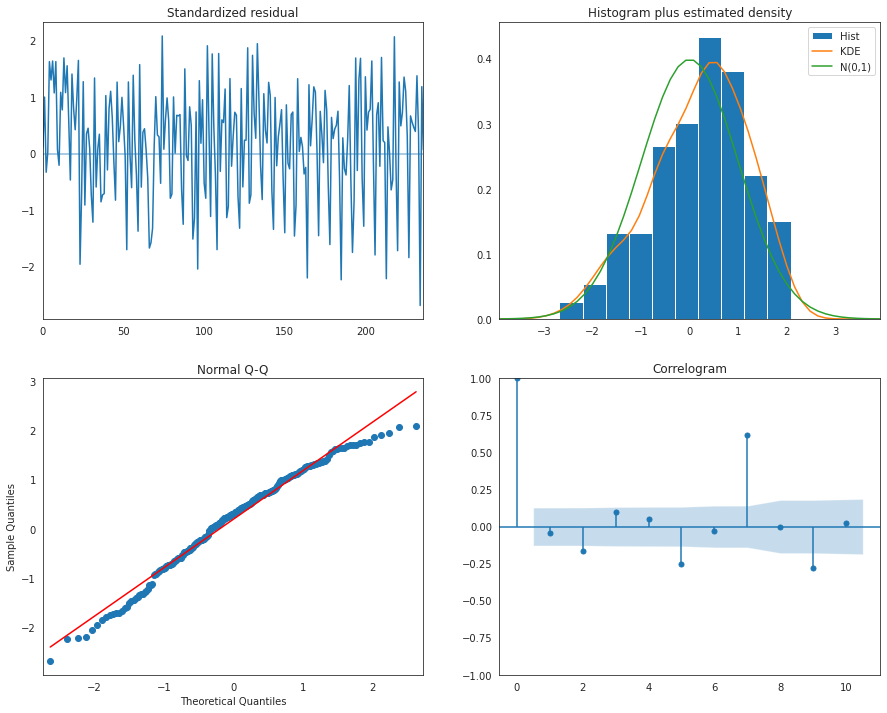

In [36]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()


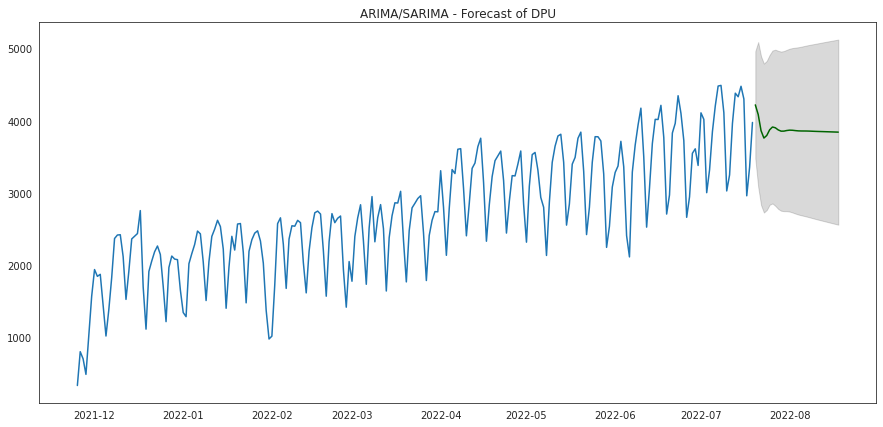

In [37]:

def forecast(ARIMA_model, periods=12):

    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df_analysis.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')


    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df_analysis["customer_dpu_cnt"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of DPU")

    plt.show()

forecast(ARIMA_model,30)

In [38]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(df_analysis_rider["customer_dpu_cnt"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=True,
                         error_action='ignore', 
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=3148.615, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3382.651, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3181.353, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3204.811, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3393.816, Time=0.00 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=3256.270, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=3148.364, Time=0.30 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=3181.400, Time=0.13 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=3149.936, Time=0.51 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=3148.630, Time=0.49 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=3167.454, Time=0.40 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=3206.425, Time=0.21 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=3

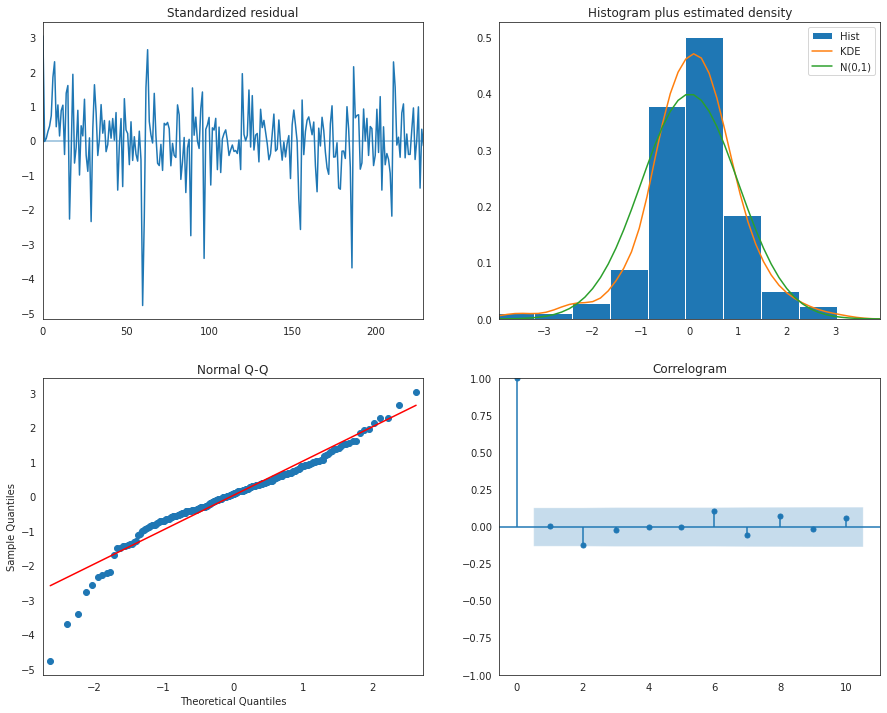

In [39]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()


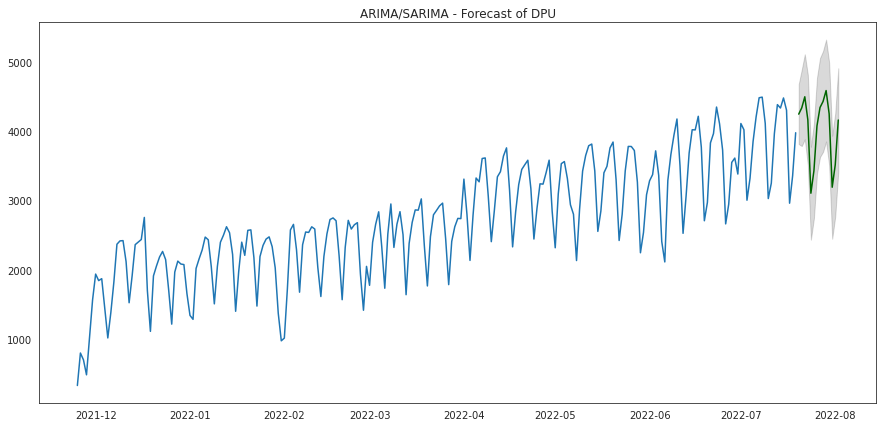

In [40]:

forecast(SARIMA_model,14)



In [85]:
df_analysis_rider['test'] = -df_analysis_rider['vehicle_active_cnt']+df_analysis_rider['vehicle_active_cnt'].max()

In [86]:
df_analysis_rider.head()

,customer_dpu_cnt,vehicle_active_cnt,customer_dau_cnt,test
date_kr,,,,
2021-11-25,334,52,14636,399
2021-11-26,802,83,20913,368
2021-11-27,704,72,15518,379
2021-11-28,488,57,10427,394
2021-11-29,1028,139,10252,312


In [139]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [140]:
df_analysis_rider.dtypes

customer_dpu_cnt      Int64
vehicle_active_cnt    Int64
customer_dau_cnt      Int64
dtype: object

In [143]:
df_analysis_rider

,customer_dpu_cnt,vehicle_active_cnt,customer_dau_cnt
date_kr,,,
2021-11-25,334,52,14636
2021-11-26,802,83,20913
2021-11-27,704,72,15518
2021-11-28,488,57,10427
2021-11-29,1028,139,10252
...,...,...,...
2022-07-15,4476,451,19258
2022-07-16,4300,361,21266
2022-07-17,2960,237,14990


In [107]:
df_analysis=df_analysis_rider.reset_index()

In [110]:
df_analysis

,date_kr,customer_dpu_cnt,vehicle_active_cnt,customer_dau_cnt
0,2021-11-25,334,52,14636
1,2021-11-26,802,83,20913
2,2021-11-27,704,72,15518
3,2021-11-28,488,57,10427
4,2021-11-29,1028,139,10252
...,...,...,...,...
232,2022-07-15,4476,451,19258
233,2022-07-16,4300,361,21266
234,2022-07-17,2960,237,14990
235,2022-07-18,3355,397,15760


In [167]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [178]:
data

,m2,time,m1,consump,pc92
time,,,,,
1946-01-01,NaN,1946-01-01,NaN,134.9,NaN
1946-04-01,NaN,1946-04-01,NaN,140.1,NaN
1946-07-01,NaN,1946-07-01,NaN,148.9,NaN
1946-10-01,NaN,1946-10-01,NaN,153.2,NaN
1947-01-01,NaN,1947-01-01,NaN,156.6,912.1
...,...,...,...,...,...
1997-07-01,"3,979.3",1997-07-01,"1,063.6","5,540.3","4,947.0"
1997-10-01,"4,046.4",1997-10-01,"1,076.0","5,593.2","4,981.0"
1998-01-01,"4,133.9",1998-01-01,"1,081.1","5,676.5","5,055.1"


In [175]:
endog

time
1959-01-01     310.4
1959-04-01     316.4
1959-07-01     321.7
1959-10-01     323.8
1960-01-01     327.3
               ...  
1980-10-01   1,836.8
1981-01-01   1,890.3
1981-04-01   1,923.5
1981-07-01   1,967.4
1981-10-01   1,983.9
Freq: QS-OCT, Name: consump, Length: 92, dtype: float32

In [177]:
exog

,const,m2
time,,
1959-01-01,1.0,289.1
1959-04-01,1.0,294.0
1959-07-01,1.0,296.7
1959-10-01,1.0,297.8
1960-01-01,1.0,299.4
...,...,...
1980-10-01,1.0,"1,601.1"
1981-01-01,1.0,"1,638.0"
1981-04-01,1.0,"1,670.6"


In [190]:
# Dataset
friedman2 = requests.get('https://www.stata-press.com/data/r12/friedman2.dta').content
data = pd.read_stata(BytesIO(friedman2))
data.index = data.time
data.index.freq = "QS-OCT"

# Variables
endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                consump   No. Observations:                   92
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -340.508
Date:                Wed, 20 Jul 2022   AIC                            691.015
Time:                        07:11:28   BIC                            703.624
Sample:                    01-01-1959   HQIC                           696.105
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0608     56.643     -0.637      0.524    -147.078      74.957
m2             1.1220      0.036     30.825      0.000       1.051       1.193
ar.L1          0.9348      0.041     22.717      0.0

In [191]:

endog

time
1959-01-01     310.4
1959-04-01     316.4
1959-07-01     321.7
1959-10-01     323.8
1960-01-01     327.3
               ...  
1980-10-01   1,836.8
1981-01-01   1,890.3
1981-04-01   1,923.5
1981-07-01   1,967.4
1981-10-01   1,983.9
Freq: QS-OCT, Name: consump, Length: 92, dtype: float32

In [188]:
df_analysis.index

DatetimeIndex(['2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04',
               ...
               '2022-07-10', '2022-07-11', '2022-07-12', '2022-07-13',
               '2022-07-14', '2022-07-15', '2022-07-16', '2022-07-17',
               '2022-07-18', '2022-07-19'],
              dtype='datetime64[ns]', name='date_kr', length=237, freq=None)

In [199]:
data.dtypes

m2                float32
time       datetime64[ns]
m1                float32
consump           float32
pc92              float32
dtype: object

In [184]:
exog

,const,m2
time,,
1959-01-01,1.0,289.1
1959-04-01,1.0,294.0
1959-07-01,1.0,296.7
1959-10-01,1.0,297.8
1960-01-01,1.0,299.4
...,...,...
1980-10-01,1.0,"1,601.1"
1981-01-01,1.0,"1,638.0"
1981-04-01,1.0,"1,670.6"


In [179]:
df_analysis.head()

,driver_type,customer_dau_cnt,customer_dpu_cnt,avg_eta_secs,avg_ata_secs,vehicle_active_cnt,driver_active_cnt,rolling_avg,rolling_std
date_kr,,,,,,,,,
2021-11-25,NXT,14636,334,543.421203438,499.610315186,52,52,NaN,NaN
2021-11-26,NXT,20913,802,528.168246445,482.503554502,83,83,NaN,NaN
2021-11-27,NXT,15518,704,548.299866131,497.215528782,72,72,NaN,NaN
2021-11-28,NXT,10427,488,527.680076628,479.954022989,57,57,NaN,NaN
2021-11-29,NXT,10252,1028,498.636528029,444.730560579,139,139,NaN,NaN


In [204]:
endog = df_analysis['customer_dpu_cnt']
exog = sm.add_constant(df_analysis['vehicle_active_cnt'])

In [202]:
df_analysis['customer_dpu_cnt']=df_analysis['customer_dpu_cnt'].astype('float')  
df_analysis['vehicle_active_cnt']=df_analysis['vehicle_active_cnt'].astype('float')  

In [203]:
df_analysis.dtypes

driver_type            object
customer_dau_cnt        Int64
customer_dpu_cnt      float64
avg_eta_secs           object
avg_ata_secs           object
vehicle_active_cnt    float64
driver_active_cnt       Int64
rolling_avg           float64
rolling_std           float64
dtype: object

In [205]:
endog

date_kr
2021-11-25     334.0
2021-11-26     802.0
2021-11-27     704.0
2021-11-28     488.0
2021-11-29   1,028.0
               ...  
2022-07-15   4,476.0
2022-07-16   4,300.0
2022-07-17   2,960.0
2022-07-18   3,355.0
2022-07-19   3,975.0
Name: customer_dpu_cnt, Length: 237, dtype: float64

In [206]:
exog

,const,vehicle_active_cnt
date_kr,,
2021-11-25,1.0,52.0
2021-11-26,1.0,83.0
2021-11-27,1.0,72.0
2021-11-28,1.0,57.0
2021-11-29,1.0,139.0
...,...,...
2022-07-15,1.0,451.0
2022-07-16,1.0,361.0
2022-07-17,1.0,237.0


In [207]:
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))

In [208]:
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:       customer_dpu_cnt   No. Observations:                  237
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1642.439
Date:                Wed, 20 Jul 2022   AIC                           3294.878
Time:                        07:28:05   BIC                           3312.218
Sample:                    11-25-2021   HQIC                          3301.867
                         - 07-19-2022                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                950.3945     82.171     11.566      0.000     789.342    1111.447
vehicle_active_cnt     6.6706      0.269     24.774      0.000       6.143       7.198
ar.L1               

In [209]:
# SARIMAX Model
SARIMAX_model = pm.auto_arima(endog, exog,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

In [210]:
df_analysis

,driver_type,customer_dau_cnt,customer_dpu_cnt,avg_eta_secs,avg_ata_secs,vehicle_active_cnt,driver_active_cnt,rolling_avg,rolling_std
date_kr,,,,,,,,,
2021-11-25,NXT,14636,334.0,543.421203438,499.610315186,52.0,52,NaN,NaN
2021-11-26,NXT,20913,802.0,528.168246445,482.503554502,83.0,83,NaN,NaN
2021-11-27,NXT,15518,704.0,548.299866131,497.215528782,72.0,72,NaN,NaN
2021-11-28,NXT,10427,488.0,527.680076628,479.954022989,57.0,57,NaN,NaN
2021-11-29,NXT,10252,"1,028.0",498.636528029,444.730560579,139.0,139,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-15,NXT,19258,"4,476.0",537.970057582,475.743953935,451.0,459,"3,933.4",573.6
2022-07-16,NXT,21266,"4,300.0",528.145564516,465.159072581,361.0,366,"3,960.6",587.6
2022-07-17,NXT,14990,"2,960.0",524.129143845,458.892764485,237.0,237,"3,951.0",605.6


In [217]:
SARIMAX_model = pm.auto_arima(df_analysis[['customer_dpu_cnt']], exogenous = df_analysis[['vehicle_active_cnt']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=2975.043, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3078.664, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3007.740, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3004.608, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3078.740, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=3049.240, Time=0.10 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=2976.949, Time=0.34 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=2976.950, Time=0.60 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=3004.692, Time=0.17 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=2980.609, Time=0.18 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=2976.438, Time=0.31 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=2976.335, Time=0.40 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=3024.234, Time=0.10 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : 

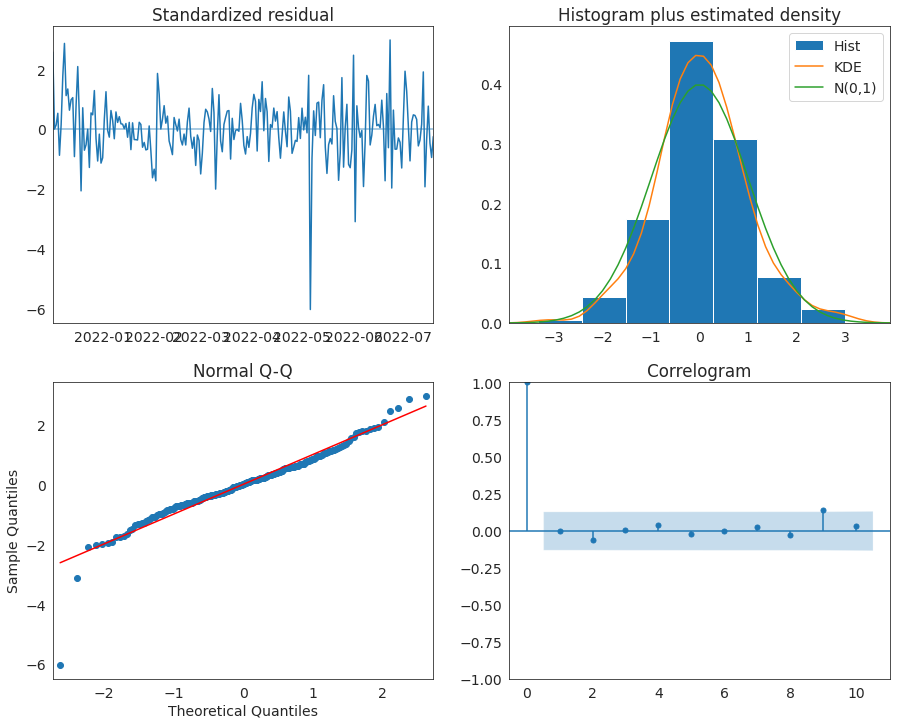

In [218]:
SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

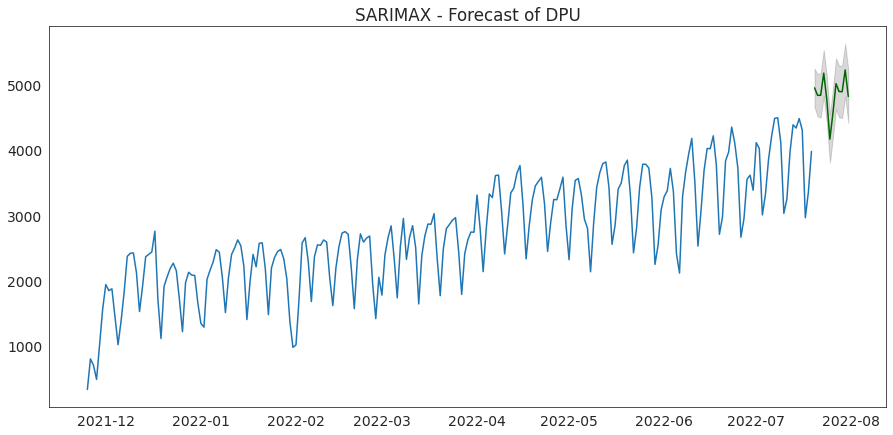

In [225]:
def sarimax_forecast(SARIMAX_model, periods=12):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"vehicle_active_cnt":500},
                    index = pd.date_range(df_analysis.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['vehicle_active_cnt']])
    index_of_fc = pd.date_range(df_analysis.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df_analysis["customer_dpu_cnt"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of DPU")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=12)